## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3   4   5   6   7   8 
118  68 145 163  85  60  87  98 

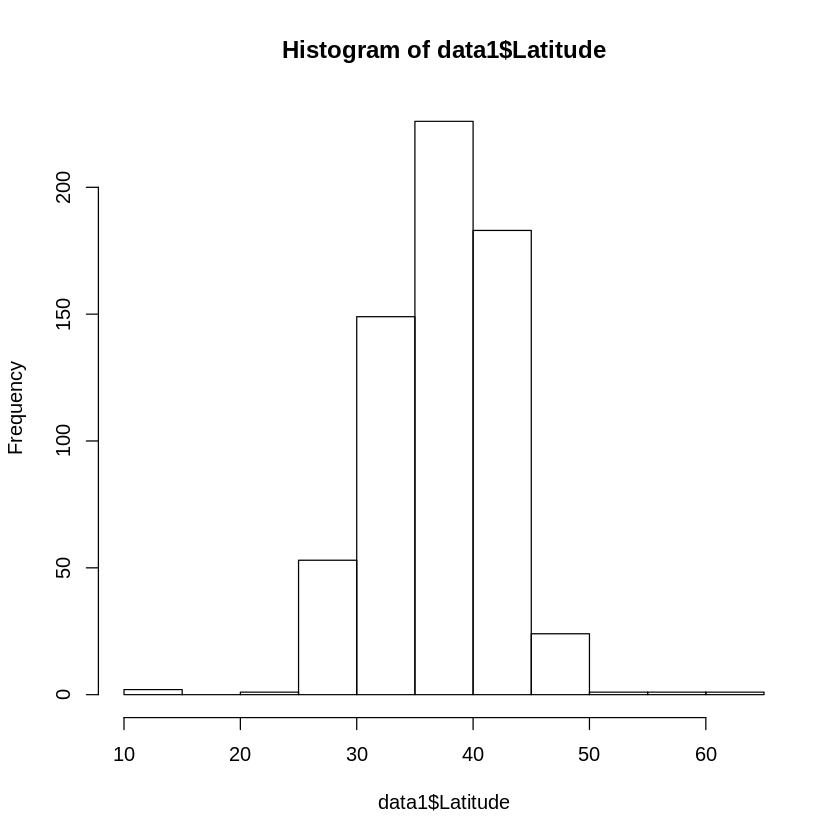

In [2]:
hist(data1$Latitude)

In [3]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)
table(data1$Political)

[1] 662   3



  1   2   3   4   5   6   7   8 
 92  55 113 128  70  54  73  76 

In [4]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 662   3


In [5]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 662   3


In [6]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 662   4


In [7]:
#ComfNS-Mean(ComfNS1,ComfNS2,ComfNS3)
tmp <- cbind(ComfNS1=data1$ComfNS1,ComfNS2=data1$ComfNS2,ComfNS3=data1$ComfNS3)
print(dim(tmp))
data1$ComfNS <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNS1","ComfNS2","ComfNS3"))]
#print(data1)

[1] 662   3


In [8]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 662   4


In [9]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 662   3


In [10]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 662   4


In [11]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 662   3


In [12]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 662   4


In [13]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 662   2


In [14]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "8"       
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [15]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662  61
[1] 627  61


In [16]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
table(data2$Political)
data2$Political[data2$Political==1]=3 #democrat
data2$Political[data2$Political==2]=3 #democrat
data2$Political[data2$Political==3]=3 #democrat
data2$Political[data2$Political==4]=2 #apolitical
data2$Political[data2$Political==8]=2 #apolitical
data2$Political[data2$Political==5]=1 #republican
data2$Political[data2$Political==6]=1 #republican
data2$Political[data2$Political==7]=1 #republican
table(data2$Political)


  1   2   3   4   5   6   7   8 
 86  53 108 124  66  51  68  71 


  1   2   3 
185 195 247 

In [17]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
table(data2$Ethnic)
data2$Ethnic[data2$Ethnic==1]=1 #white
data2$Ethnic[data2$Ethnic==2]=0 #non-white
data2$Ethnic[data2$Ethnic==3]=0
data2$Ethnic[data2$Ethnic==4]=0
data2$Ethnic[data2$Ethnic==5]=0
data2$Ethnic[data2$Ethnic==6]=0
data2$Ethnic[data2$Ethnic==7]=0
table(data2$Ethnic)


  1   2   3   4   5   6   7 
519  33  26   3  31  13   2 


  0   1 
108 519 

In [18]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude")

In [19]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS"    
 [6] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
[11] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
[16] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"   "Ethnic"    
[21] "Frugal"     "Gender"     "HabitC"     "HabitC3"    "HabitE1"   
[26] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
[31] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
[36] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
[41] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
[46] "Latitude"   "MC"         "MC1"        "MC2"        "OwnRent"   
[51] "PBC"        "PBC3R"      "Political"  "RewardForm" "SN"        
[56] "SN3"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
[61] "Trust"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"   "SubNorm"   
[21] "Trust"

In [20]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [21]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [22]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "Frugal"     "MC"         "EnergyC"    "Trust"     
[16] "ComfNS"     "Atti"       "SubNorm"    "PBC"        "SN"        
[21] "HabitG"     "HabitC"

In [23]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,...,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC


In [24]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     5.0     8.0 


  1   2   3   4   5   6   7   8 
 54  42 120 214  56  59  48  34 


  1   2   3   4   5 
 66 221 144 115  81 

In [25]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "Frugal"     "MC"         "EnergyC"    "Trust"     
[16] "ComfNS"     "Atti"       "SubNorm"    "PBC"        "SN"        
[21] "HabitG"     "HabitC"

In [26]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [27]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.80      11.15       0.50       0.52       1.12       1.21       0.82 
    Ethnic     Income       Educ   Latitude     Frugal         MC    EnergyC 
      0.38       1.97       1.11       5.06       0.93       1.07       1.39 
     Trust     ComfNS       Atti    SubNorm        PBC         SN     HabitG 
      1.40       1.45       1.10       1.34       0.94       1.41       1.17 
    HabitC 
      1.60

In [28]:
hiCor(data2,.2)

,IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Income,Educ,Frugal,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC
IncHomeS,1.0000,0.1296,0.031,0.0754,0.0173,0.0060,0.0033,0.026,-0.0073,-0.096,-0.0355,-0.0793,-0.0423,0.2959,-0.099,-0.032,-0.0715,0.0165,-0.039,-0.1125
Age,0.1296,1.0000,0.107,0.3681,0.2718,-0.0196,-0.0799,0.194,0.1184,-0.028,0.0686,-0.0052,0.0206,0.0684,0.103,-0.041,0.0201,0.0260,0.018,0.0668
Gender,0.0306,0.1069,1.000,0.0226,0.0111,0.1429,0.0946,-0.093,-0.0361,0.143,0.0858,0.2057,0.0596,0.0570,0.244,0.099,0.0332,0.0991,0.069,0.0741
OwnRent,0.0754,0.3681,0.023,1.0000,0.4810,0.1846,-0.1043,0.362,0.0917,-0.064,0.0427,-0.0480,0.0676,0.0039,-0.011,-0.052,-0.0403,0.0886,-0.059,0.0355
SqftCate,0.0173,0.2718,0.011,0.4810,1.0000,0.3589,-0.1263,0.385,0.0255,-0.073,-0.0067,-0.0680,0.0046,0.0152,-0.016,-0.026,-0.0908,0.1054,-0.060,0.0468
HouseholdS,0.0060,-0.0196,0.143,0.1846,0.3589,1.0000,-0.1411,0.181,-0.1696,-0.042,-0.0411,-0.0790,0.0047,0.0573,-0.020,-0.017,-0.1038,0.1006,-0.088,-0.0918
Political,0.0033,-0.0799,0.095,-0.1043,-0.1263,-0.1411,1.0000,-0.078,0.0706,0.054,-0.0166,0.2811,-0.0413,-0.1056,0.168,0.090,-0.0087,0.0084,-0.023,-0.0026
Income,0.0258,0.1942,-0.093,0.3624,0.3851,0.1806,-0.0783,1.000,0.2642,-0.050,-0.0497,-0.0629,0.0246,0.0634,-0.046,-0.028,-0.0844,0.0482,-0.130,-0.0222
Educ,-0.0073,0.1184,-0.036,0.0917,0.0255,-0.1696,0.0706,0.264,1.0000,0.037,0.0686,0.0902,0.0320,-0.1121,0.022,0.133,-0.0542,0.0257,-0.079,0.1059
Frugal,-0.0962,-0.0279,0.143,-0.0645,-0.0728,-0.0420,0.0539,-0.050,0.0370,1.000,0.4655,0.5046,0.0719,-0.0651,0.500,0.258,0.3019,0.1427,0.191,0.1613


ERROR: Error in plot.window(...): argument is missing, with no default


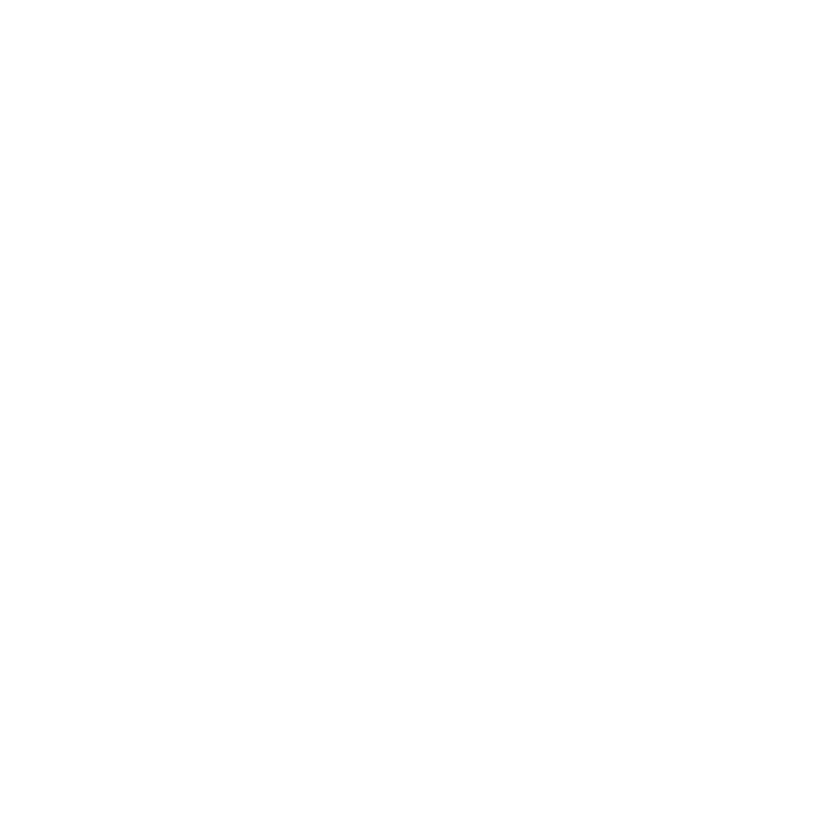

In [29]:
plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [30]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:22];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:22){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    Frugal    MC EnergyC  Atti SubNorm   PBC   SN HabitG HabitC
PC1  -0.37 -0.33   -0.37 -0.41   -0.32 -0.23 -0.2  -0.27  -0.24
[1] 0.25
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.34   -0.49    -0.51      -0.28  -0.42
[1] 0.32
    IncHomeS Gender  Educ Latitude ComfNS HabitC
PC3     0.48   0.24 -0.35    -0.31   0.54  -0.23
[1] 0.39
     Age Gender HouseholdS Political Ethnic EnergyC   PBC HabitG HabitC
PC4 -0.2   0.31       0.39      0.38  -0.31    0.29 -0.35  -0.27  -0.23
[1] 0.45
    IncHomeS  Age HouseholdS Political Educ HabitG
PC5     0.28 0.31      -0.45      0.37 0.48  -0.21
[1] 0.5
    Ethnic Latitude Frugal    SN HabitC
PC6   0.54      0.4   0.29 -0.33  -0.36
[1] 0.55
    Ethnic Educ Latitude    MC Trust ComfNS SubNorm   SN
PC7   0.26 0.23     0.31 -0.21   0.5   0.25     0.3 0.41
[1] 0.6
      Age Gender Income Frugal   MC ComfNS HabitC
PC8 -0.44   -0.5   0.33   0.21 0.21    0.2  -0.28
[1] 0.64
    IncHomeS Gender OwnRent Political Educ Trust SubNorm   PBC Ha

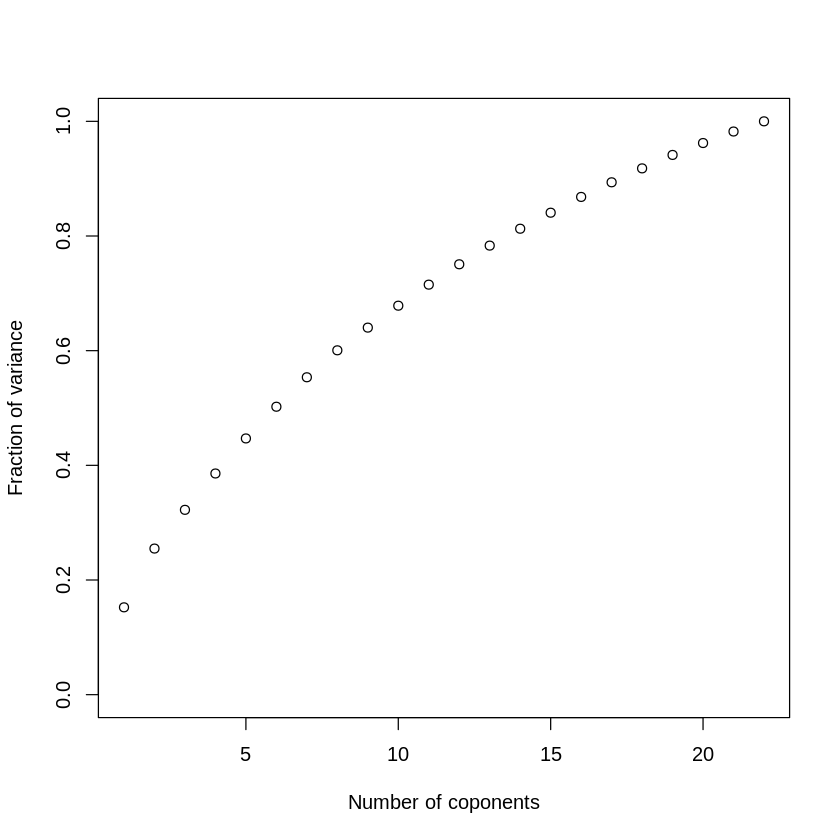

In [31]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [32]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [33]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,17,0.46
EnergyC,14,0.43
Frugal,12,0.38
SqftCate,5,0.37
OwnRent,4,0.31
MC,13,0.30
HouseholdS,6,0.26
Income,9,0.26
SubNorm,18,0.25
HabitC,22,0.23
HabitG,21,0.22


In [34]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [45]:
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')

In [46]:
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [47]:
table(data2[,"IncHomeS"])


  1   2   3   4   5   6   7   8 
 54  42 120 214  56  59  48  34 

In [48]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-4.679 -1.110 -0.149  1.052  4.187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.16415    1.61342    2.58    0.010 *  
Atti         0.07695    0.12787    0.60    0.548    
EnergyC     -0.24906    0.10740   -2.32    0.021 *  
SqftCate    -0.04622    0.12010   -0.38    0.701    
OwnRent     -0.01430    0.23267   -0.06    0.951    
MC          -0.07115    0.11727   -0.61    0.545    
HouseholdS  -0.06438    0.09381   -0.69    0.493    
Income       0.02675    0.06097    0.44    0.661    
SubNorm     -0.16566    0.09069   -1.83    0.069 .  
HabitC      -0.00546    0.07367   -0.07    0.941    
Educ         0.12629    0.10566    1.20    0.233    
PBC         -0.14140    0.12590   -1.12    0.262    
Political    0.15859    0.14580    1.09    0.278    
Gender       0.29588    0.23023    1.29    0.200    
ComfNS       0.47119    0.07794    6

In [39]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,3.3e+01,3.3e+01,11.2850,8.3e-04
EnergyC,1,2.9e+00,2.9e+00,1.0072,3.2e-01
SqftCate,1,6.4e-01,6.4e-01,0.2196,6.4e-01
OwnRent,1,6.3e+00,6.3e+00,2.1778,1.4e-01
MC,1,5.7e-01,5.7e-01,0.1973,6.6e-01
HouseholdS,1,3.3e-01,3.3e-01,0.1150,7.3e-01
Income,1,4.0e-01,4.0e-01,0.1400,7.1e-01
SubNorm,1,7.3e-03,7.3e-03,0.0025,9.6e-01
HabitG,1,2.5e-01,2.5e-01,0.0876,7.7e-01
HabitC,1,2.9e+01,2.9e+01,9.9649,1.7e-03


In [40]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.97       0.85       0.93       0.57       0.47       0.87       0.93 
    Ethnic     Income       Educ   Latitude     Frugal         MC    EnergyC 
      0.99       0.74       0.98       1.00       0.57       0.73       0.55 
     Trust     ComfNS       Atti    SubNorm        PBC         SN     HabitG 
      0.95       0.96       0.43       0.77       0.89       0.89       0.85 
    HabitC 
      0.89 

Loadings:
           Factor1 Factor2
Frugal      0.66          
MC          0.52          
EnergyC     0.67          
Atti        0.75          
OwnRent             0.66  
SqftCate            0.73  
Income              0.51  
IncHomeS                  
Age                 0.38  
Gender                    
HouseholdS          0.35  
Political                 
Ethnic                    
Educ                      
Latitude       


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


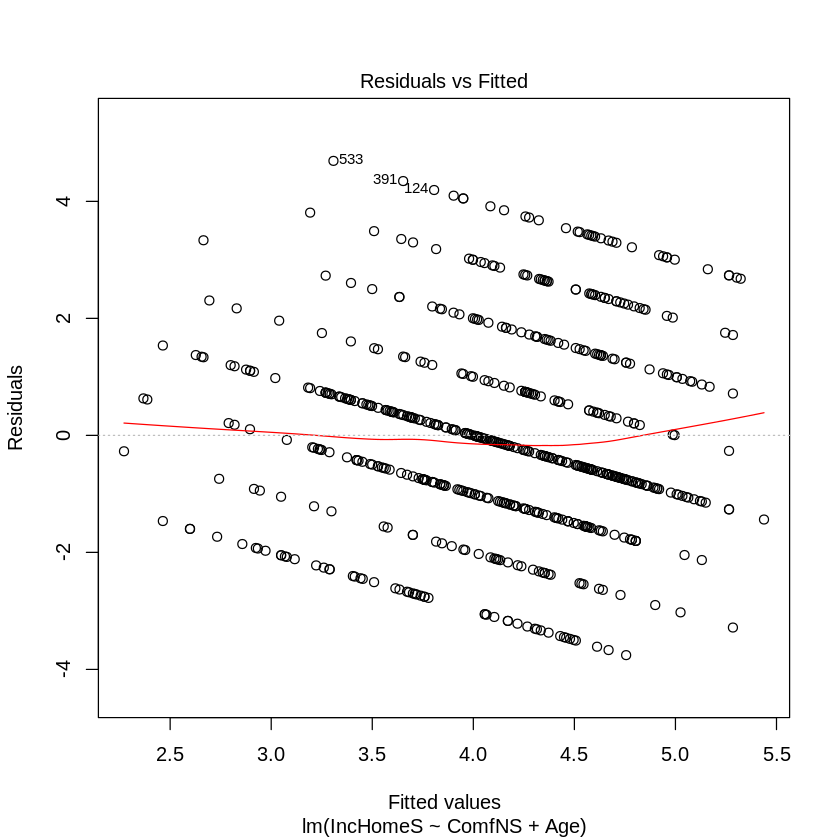

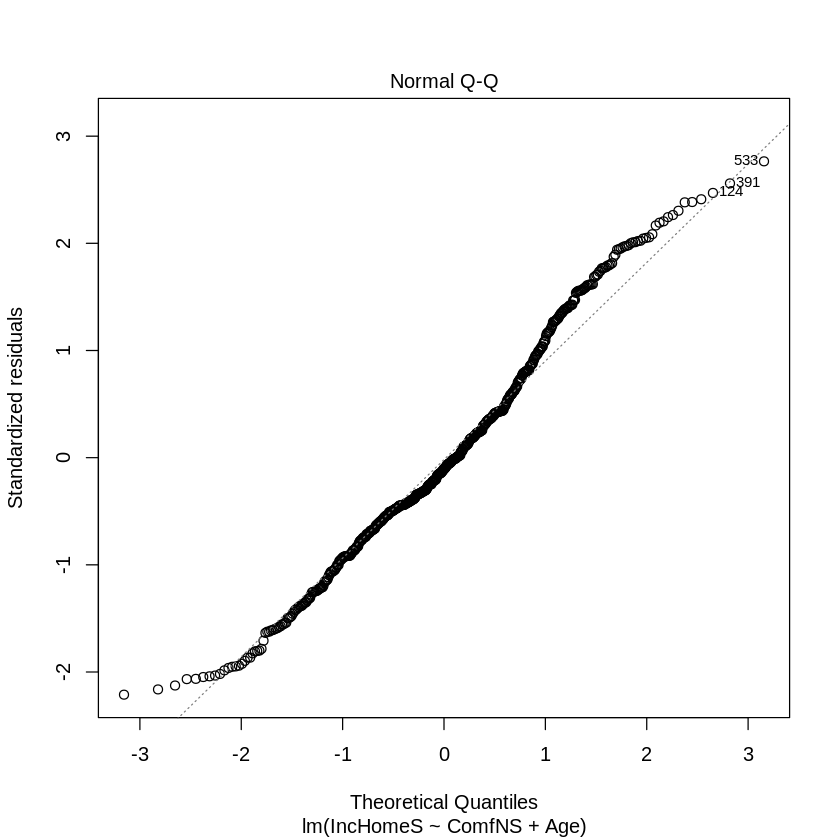

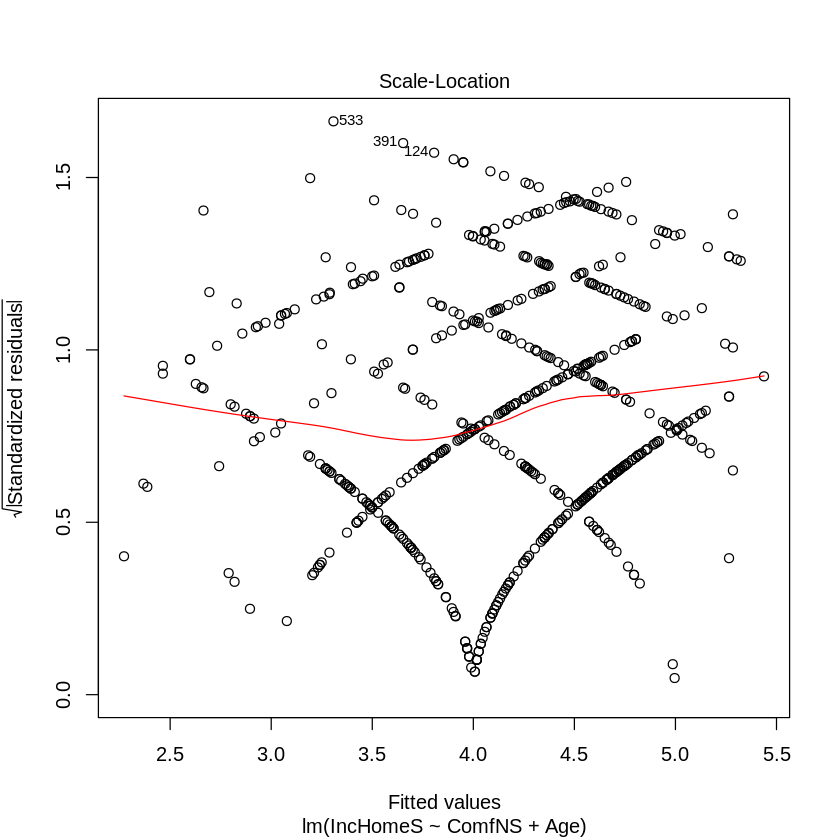

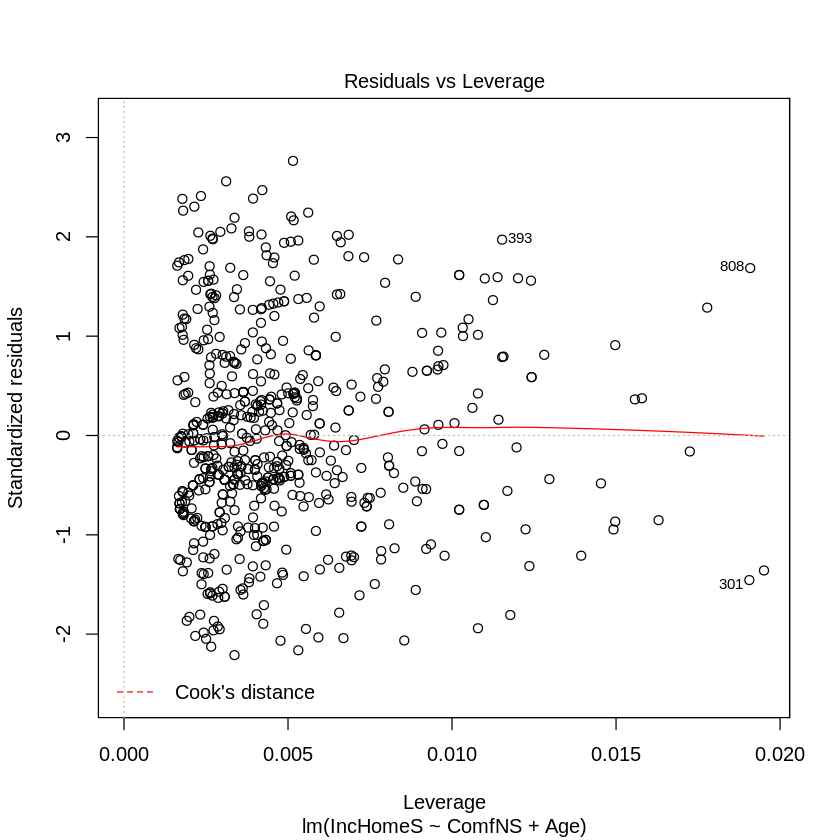

In [41]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)
plot(mod)

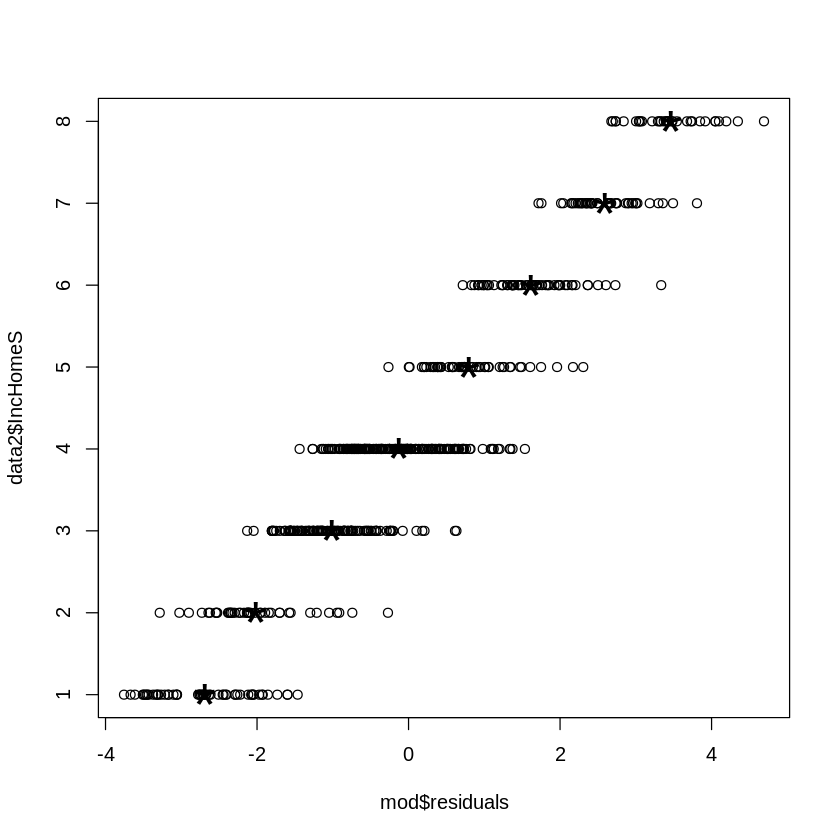

In [42]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [43]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

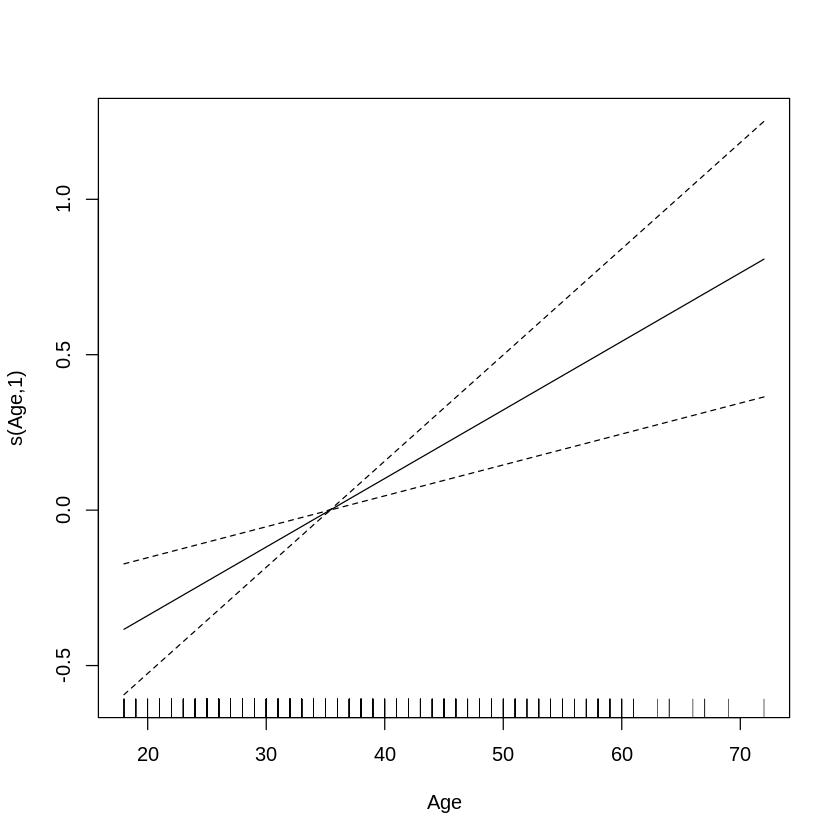

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



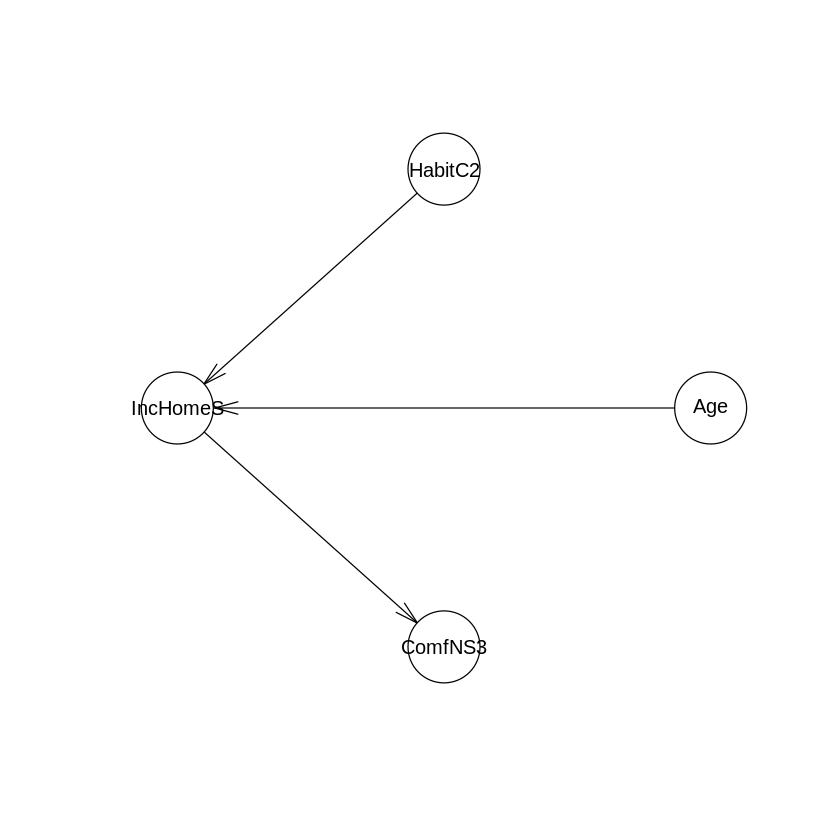

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

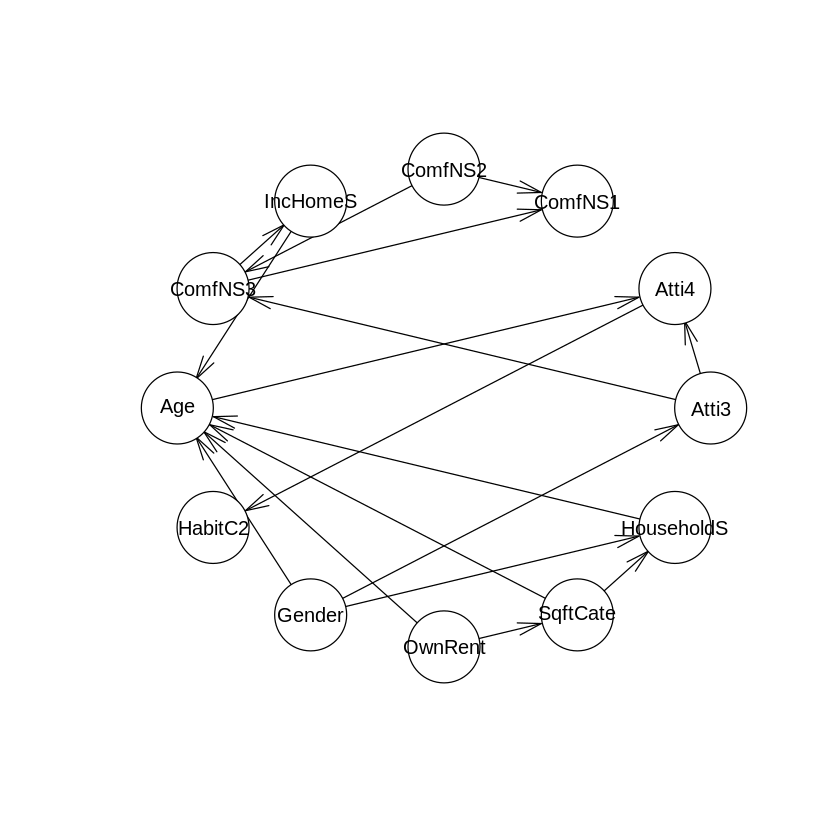

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)